# Titanic: Machine Learning from Disaster

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
figsize=(15,7)

### Data load

In [2]:
train = pd.read_csv("train.csv", index_col = "PassengerId")
test = pd.read_csv("test.csv", index_col = "PassengerId")
gender = pd.read_csv("gender_submission.csv", index_col = "PassengerId")

### Training data

In [3]:
print("Shape: ", train.shape, "\nStructure:")
print(train.info())
train.head()

Shape:  (891, 11) 
Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First look into data:
* is missing data in Age column
* is missing data in Cabin column
* is missing data in Embarked column


### Testing data

In [4]:
print("Shape: ", test.shape, "\nStructure:")
print(test.info())
test.head()

Shape:  (418, 10) 
Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Gender data 

It looks like gender saves information about survived for testing data. It means that gender is our target in machine learning.

In [5]:
print("Shape: ", gender.shape, "\nStructure:")
print(gender.info())
gender.head()

Shape:  (418, 1) 
Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
Survived    418 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB
None


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


I prefer less variables, so I will join gender and test to one variable test. 

In [6]:
test = test.merge(gender, left_index=True, right_index=True)
print("Shape: ", test.shape, "\nStructure:")
print(test.info())
test.head()

Shape:  (418, 11) 
Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 59.2+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In testing data we also have some missing values:
* is missing data in Age column
* is missing data in Fate column
* is missing data in Cabin column

### Trainset analysis

* pclass: ticket class,  a proxy for socio-economic status (SES) 1st = Upper, 2nd = Middle, 3rd = Lower
* survival: 0 - No, 1 - Yes
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin number
* embarked: Port of Embarkation

In [7]:
train.groupby("Pclass")["Survived"].agg("count").sort_values(ascending = False)

Pclass
3    491
1    216
2    184
Name: Survived, dtype: int64

In [8]:
train.groupby(["Pclass","Survived"])["Survived"].agg("count")

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

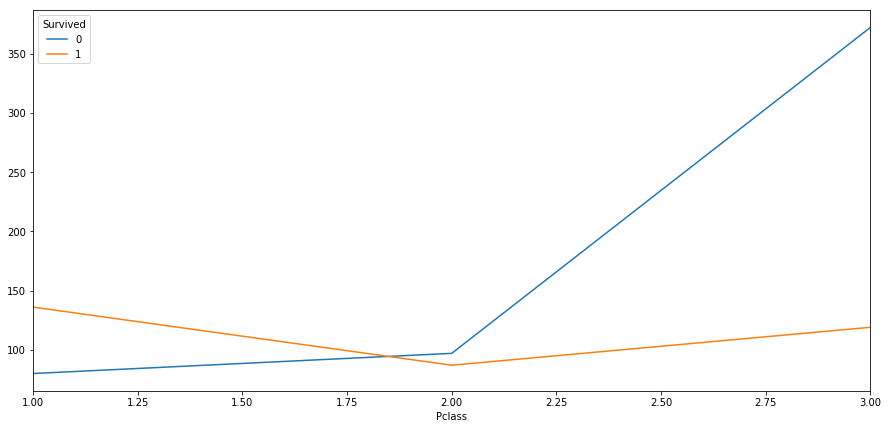

In [9]:
train.groupby(["Pclass","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

In [10]:
train.groupby("Sex")["Survived"].agg("count").sort_values(ascending = False)

Sex
male      577
female    314
Name: Survived, dtype: int64

In [11]:
train.groupby(["Sex","Survived"])["Survived"].agg("count")

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

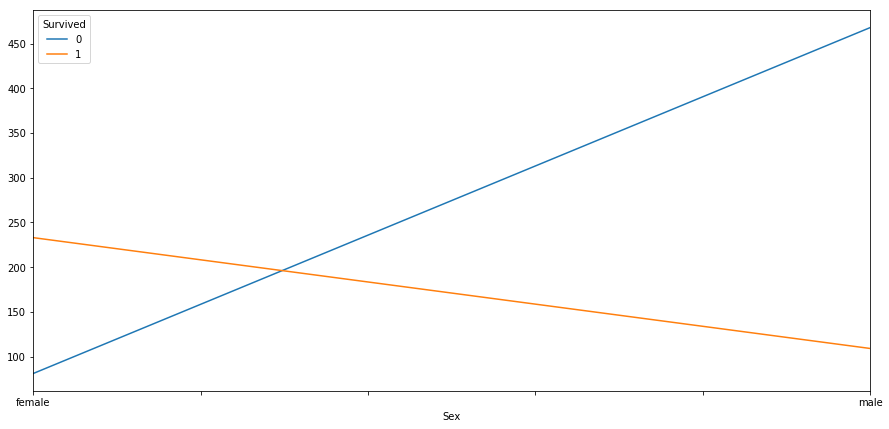

In [12]:
train.groupby(["Sex","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

In [13]:
train.groupby(["Survived","Sex"])["Age"].agg("mean")

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

In [14]:
train.groupby(["SibSp","Survived"])["Survived"].agg("count")

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

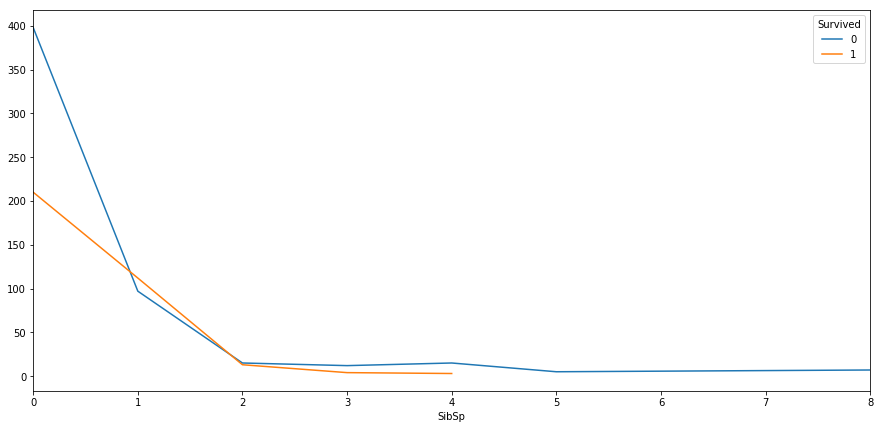

In [15]:
train.groupby(["SibSp","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

In [16]:
train.groupby(["Parch","Survived"])["Survived"].agg("count")

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

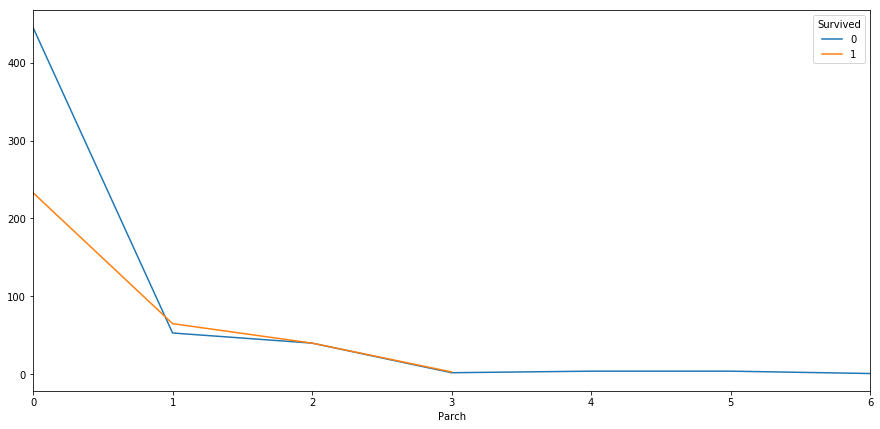

In [17]:
train.groupby(["Parch","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

In [18]:
train.groupby(["Embarked","Survived"])["Survived"].agg("count")

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

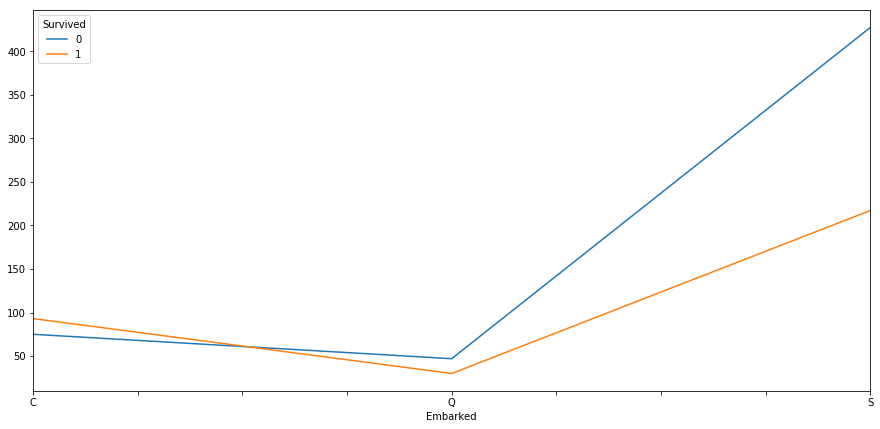

In [19]:
train.groupby(["Embarked","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

### Challenges

* <i>How to deal with missing values in Cabin</i><br>
The best solution in my opinion is train model only wiith data WITH Cabin, another one only WITHOUT data in Cabin, the last one with all data - check which one is better. There is no chance to fill this field in any sensible way.<br><br>
* <i>How to deal with missing values in Age</i> <br>
Fill data by mean/median per sex.<br><br>
* <i>Feature engineering<br> Take Mr, Mrs etc from name. 

# Data processing

In [20]:
def factorize_ (x):
    if x == 'Mr':
        return 0
    elif x == 'Mrs':
        return 1
    elif x == 'Miss':
        return 2
    elif x == 'Master':
        return 3
    elif x == 'Don':
        return 4
    elif x == 'Rev':
        return 5
    elif x == 'Dr':
        return 6
    elif x == 'Mme':
        return 7
    elif x == 'Ms':
        return 8
    elif x == 'Major':
        return 9
    elif x == 'Lady':
        return 10
    elif x == 'Sir':
        return 11
    elif x == 'Mlle':
        return 12
    elif x == 'Col':
        return 13
    elif x == 'Capt':
        return 14
    elif x == 'theCountess':
        return 15
    elif x == 'Jonkheer':
        return 16
    else:
        return 17

In [21]:
train["Sex"] = train.Sex.apply(lambda x: 0 if x=="male" else 1)
test["Sex"] = test.Sex.apply(lambda x: 0 if x=="male" else 1)
train["Embarked"] = train.Embarked.apply(lambda x: 0 if x=="C" else (1 if x=="Q" else 2))
test["Embarked"] = test.Embarked.apply(lambda x: 0 if x=="C" else (1 if x=="Q" else 2))
train["Name"] = train.Name.apply(lambda x: factorize_(x.split(",")[1].split(".")[0].replace(" ","")))
test["Name"] = test.Name.apply(lambda x: factorize_(x.split(",")[1].split(".")[0].replace(" ","")))
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,0,22.0,1,0,A/5 21171,7.2500,NaN,2
2,1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0
3,1,3,2,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
4,1,1,1,1,35.0,1,0,113803,53.1000,C123,2
5,0,3,0,0,35.0,0,0,373450,8.0500,NaN,2


In [22]:
train.groupby(["Name","Survived"])["Survived"].agg("count").sort_values(ascending = False)

Name  Survived
0     0           436
2     1           127
1     1            99
0     1            81
2     0            55
1     0            26
3     1            23
      0            17
5     0             6
6     0             4
      1             3
12    1             2
7     1             1
15    1             1
8     1             1
9     0             1
4     0             1
9     1             1
10    1             1
11    1             1
13    0             1
      1             1
14    0             1
16    0             1
Name: Survived, dtype: int64

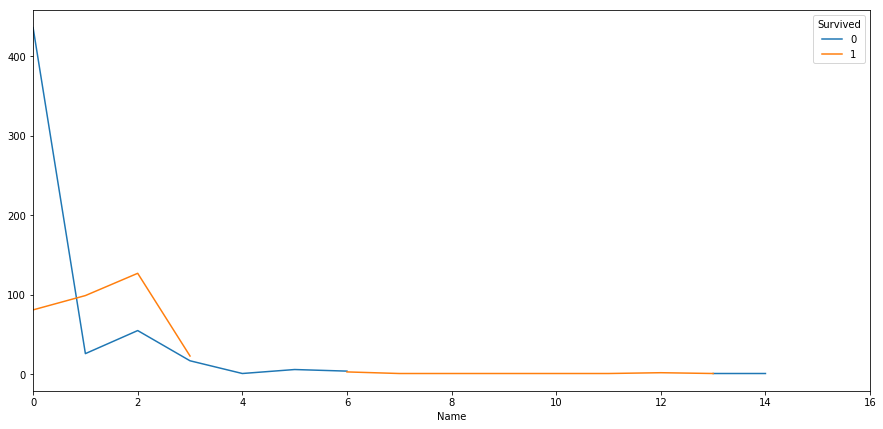

In [23]:
train.groupby(["Name","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

In [24]:
del train["Ticket"]
del train["Cabin"]

In [25]:
ages_train = pd.DataFrame(train.groupby("Name")["Age"].agg("mean"))
ages_test = pd.DataFrame(test.groupby("Name")["Age"].agg("mean"))
fare_test_mean = test.Fare.mean()

In [26]:
def fill_ages(name, ages):
    if name == 0:
        return ages.ix[0].Age
    elif name == 1:
        return ages.ix[1].Age
    elif name == 2:
        return ages.ix[2].Age
    elif name == 3:
        return ages.ix[3].Age
    elif name == 4:
        return ages.ix[4].Age
    elif name == 5:
        return ages.ix[5].Age
    elif name == 6:
        return ages.ix[6].Age
    elif name == 7:
        return ages.ix[7].Age
    elif name == 8:
        return ages.ix[8].Age
    elif name == 9:
        return ages.ix[9].Age
    elif name == 10:
        return ages.ix[10].Age
    elif name == 11:
        return ages.ix[11].Age
    elif name == 12:
        return ages.ix[12].Age
    elif name == 13:
        return ages.ix[13].Age
    elif name == 14:
        return ages.ix[14].Age
    elif name == 15:
        return ages.ix[15].Age
    elif name == 16:
        return ages.ix[16].Age
    else:
        return ages.Age.mean()


In [27]:
train["Age"] = train.apply(lambda x: fill_ages(x["Name"], ages_train) if math.isnan(x["Age"]) else x["Age"], axis=1)
test["Age"] = test.apply(lambda x: fill_ages(x["Name"], ages_train) if math.isnan(x["Age"]) else x["Age"], axis=1)
test["Fare"] = test.apply(lambda x: fare_test_mean if math.isnan(x["Fare"]) else x["Fare"], axis=1)

c:\python34\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 69.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Cabin       91 non-null object
Embarked    418 non-null int64
Survived    418 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 59.2+ KB


# Machine Learning models

In [29]:
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

c:\python34\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
columns = ["Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_train = train[columns]
y_train = train["Survived"]
X_test = test[columns]
y_test = test["Survived"]

In [31]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(891, 8) (891,)
(418, 8) (418,)


### DummyClassifier - base model

In [32]:
base_cls = DummyClassifier()

In [33]:
base_cls.fit(X_train, y_train)
base_cls_predict = base_cls.predict(X_test)
print("base_cls", accuracy_score(y_test, base_cls_predict))

base_cls 0.540669856459


### SVM

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
print("svc", accuracy_score(y_test, svc_predict))

svc 0.703349282297


### Linear SVC

In [36]:
from sklearn.svm import LinearSVC

In [37]:
lin_svc = LinearSVC()
lin_svc.fit(X_train, y_train)
lin_svc_predict = lin_svc.predict(X_test)
print("lin_svc", accuracy_score(y_test, lin_svc_predict))

lin_svc 0.897129186603


### KNeighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

           0
9   0.712919
8   0.710526
13  0.705742
5   0.703349
6   0.703349
14  0.703349
7   0.700957
11  0.700957
15  0.696172
22  0.693780
18  0.693780
10  0.693780
20  0.693780
16  0.693780
17  0.693780
24  0.691388
3   0.688995
21  0.686603
25  0.686603
12  0.686603
23  0.684211
19  0.677033
4   0.677033
2   0.665072
1   0.636364
0   0.000000


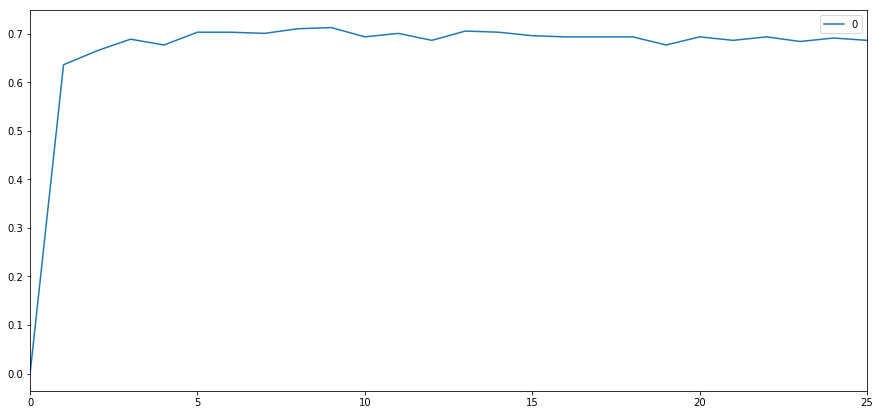

In [39]:
knn_scores = [0]
for n in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_test)
    knn_scores.append(accuracy_score(y_test, knn_predict))

knn_scores = pd.DataFrame(knn_scores)
knn_scores.plot(figsize = figsize);
print(knn_scores.sort_values(by=0, ascending = False))

### GradientBoostingClassifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
print("gbc: ", accuracy_score(y_test, gbc_predict))

gbc:  0.875598086124


### RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
print("rfc: ", accuracy_score(y_test, rfc_predict))

rfc:  0.796650717703


### NaiveBayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)
print("nb: ", accuracy_score(y_test, nb_predict))

nb:  0.909090909091


In [46]:
models = {"DummyClassifier":accuracy_score(y_test, base_cls_predict),
         "SVC":accuracy_score(y_test, svc_predict),
         "Linear SVC":accuracy_score(y_test, lin_svc_predict),
         "KNeighbors":knn_scores.ix[9].values,
         "GradientBoostingClassifier":accuracy_score(y_test, gbc_predict),
         "RandomForestClassifier":accuracy_score(y_test, rfc_predict),
         "NaiveBayes":accuracy_score(y_test, nb_predict),}

c:\python34\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [47]:
models = pd.DataFrame(models)
models

,DummyClassifier,GradientBoostingClassifier,KNeighbors,Linear SVC,NaiveBayes,RandomForestClassifier,SVC
0,0.54067,0.875598,0.712919,0.897129,0.909091,0.796651,0.703349


# Chaning parameters in ML models

Most effective models are following:
* NaiveBayes
* GradienBoostingClassifier
* Linear SVC
* RandomForestClassifier
    
In this part I would like replace default values in models

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
           0
3   0.949761
4   0.949761
5   0.949761
2   0.947368
6   0.944976
7   0.923445
8   0.909091
9   0.901914
10  0.894737
11  0.882775
12  0.875598
13  0.868421
15  0.858852
14  0.856459
16  0.856459
1   0.815789
0   0.000000


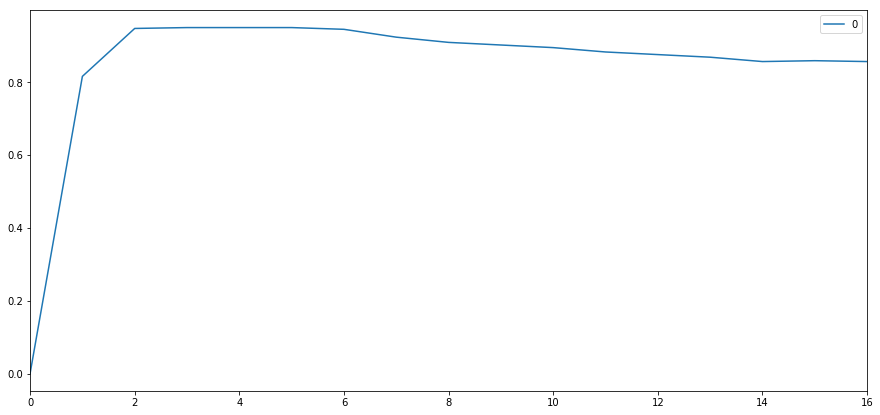

In [48]:
print(gbc)
gbc_scores=[0]
for n in (5,9,10,11,12,15,20,25,40,50,75,100,125,150,200,250):
    gbc_n = GradientBoostingClassifier(n_estimators=n, random_state=1)
    gbc_n.fit(X_train, y_train)
    gbc_n_predict = gbc_n.predict(X_test)
    gbc_scores.append(accuracy_score(y_test, gbc_n_predict))

gbc_scores = pd.DataFrame(gbc_scores)
gbc_scores.plot(figsize=figsize)
print(gbc_scores.sort_values(by=0, ascending = False))
#n_estimators the best in range (10,15)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
          0
1  1.000000
2  0.985646
3  0.949761
4  0.904306
5  0.866029
7  0.866029
6  0.861244
8  0.849282
9  0.842105
0  0.000000


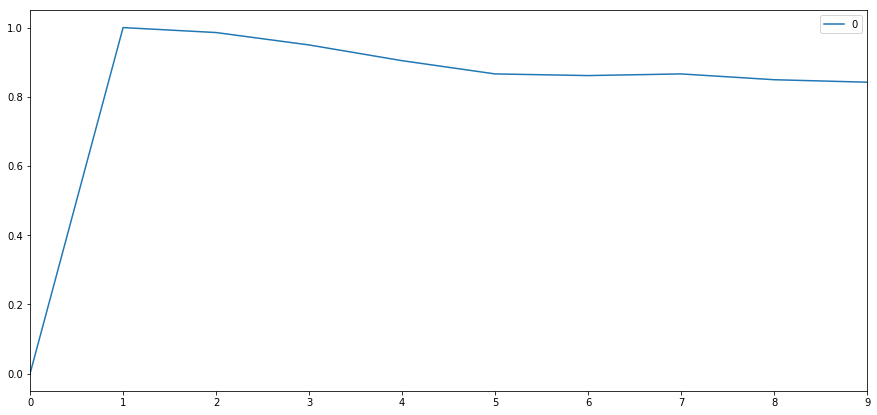

In [49]:
print(gbc)
gbc_scores=[0]
for max_depth in range(1,10):
    gbc_n = GradientBoostingClassifier(n_estimators=10, random_state=1, max_depth=max_depth)
    gbc_n.fit(X_train, y_train)
    gbc_n_predict = gbc_n.predict(X_test)
    gbc_scores.append(accuracy_score(y_test, gbc_n_predict))

gbc_scores = pd.DataFrame(gbc_scores)
gbc_scores.plot(figsize=figsize)
print(gbc_scores.sort_values(by=0, ascending = False))
#n_estimators the best in range (10,15)

In [107]:
gbc_n = GradientBoostingClassifier(n_estimators=10, random_state=1, max_depth=1)
gbc_n.fit(X_train, y_train)
gbc_n_predict = gbc_n.predict(X_test)
submission = pd.DataFrame(y_test.index)
submission["Survived"] = gbc_n_predict
submission.to_csv("submission.csv", index=False)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
          0
1  0.964115
2  0.956938
5  0.952153
3  0.947368
4  0.940191
7  0.899522
8  0.806220
6  0.736842
0  0.000000


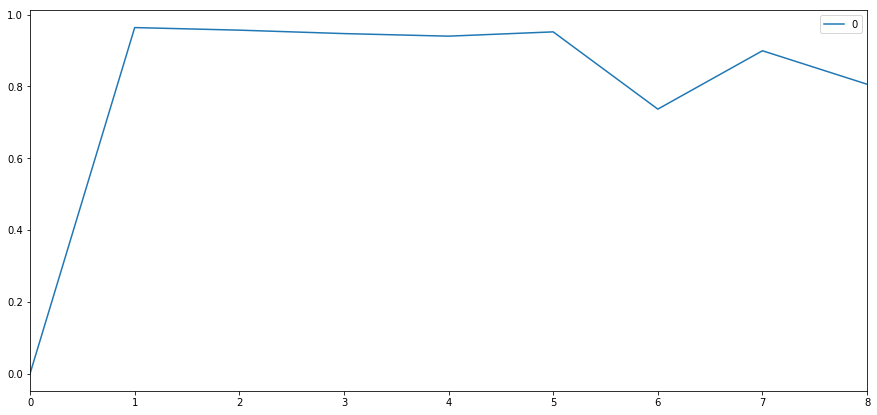

In [59]:
print(lin_svc)
linearSVC_scores=[0]
for c in (0.01,0.05, 0.1, 0.15, 0.25, 0.50, 0.75, 1):
    lin_svc_i = LinearSVC(C=c, max_iter=1300)
    lin_svc_i.fit(X_train, y_train)
    lin_svc_i_predict = lin_svc_i.predict(X_test)
    linearSVC_scores.append(accuracy_score(y_test, lin_svc_i_predict))
linearSVC_scores = pd.DataFrame(linearSVC_scores)
linearSVC_scores.plot(figsize=figsize)
print(linearSVC_scores.sort_values(by=0, ascending = False))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
           0
12  0.818182
13  0.818182
23  0.818182
22  0.818182
21  0.818182
20  0.818182
19  0.818182
18  0.818182
17  0.818182
16  0.818182
15  0.818182
14  0.818182
24  0.818182
1   0.818182
11  0.818182
10  0.818182
9   0.818182
8   0.818182
7   0.818182
6   0.818182
5   0.818182
4   0.818182
3   0.818182
2   0.818182
0   0.000000


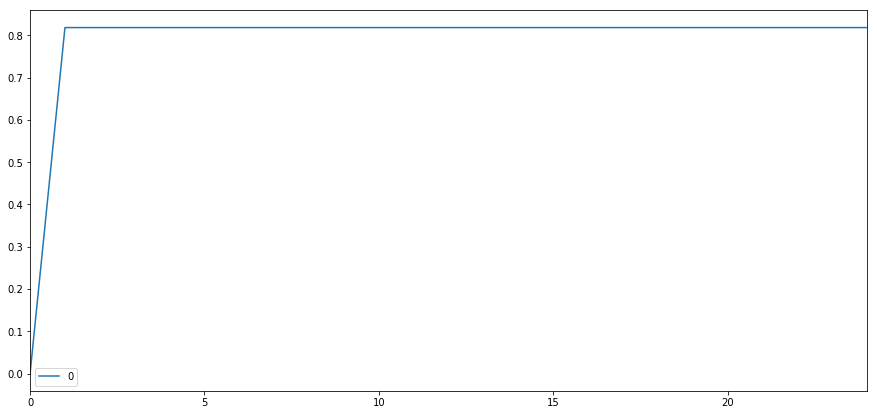

In [66]:
print(rfc)
rfc_scores=[0]
for n in range(1,25):
    rfc_n = RandomForestClassifier(n_jobs=n, random_state=1)
    rfc_n.fit(X_train, y_train)
    rfc_n_predict = rfc_n.predict(X_test)
    rfc_scores.append(accuracy_score(y_test, rfc_n_predict))
rfc_scores = pd.DataFrame(rfc_scores)
rfc_scores.plot(figsize=figsize)
print(rfc_scores.sort_values(by=0, ascending = False))